<a href="https://colab.research.google.com/github/rakibulalamshamim/MAT120lab/blob/main/Lab5_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equation (ODE)
We'll look into

1. First order ODE:
> 1. $\frac{dx}{dt}=v(t) \ \ $ is an example first order ODE. If $v$ is constant of time, the solution of this ODE is $x = vt + C \ \ $. Where $C$ is some arbitrary constant fixed by **initial condition**. \\
> 2. Another example is the radioactive decay equation:
$\frac{dN}{dt}= -\lambda N$. Whose solution is given by $N= N_0e^{-\lambda t}$. \\

2. Second order ODE:
> 1. Newaton's equation of motion: $F=ma \ \ $ or,  $\ \ \frac{d^2x}{dt^2}=F/m$.
> 2. Simple Harmonic Oscillator (Hooke's law: $F=-kx) \ \ $, the ODE is $\ \ \frac{d^2x}{dt^2}=-\frac{k}{m}x$. The $sol^n$ is $x= A \sin(\omega t) \ \ $ or,  $x= B \cos(\omega t) \ \ $ with $\ \ \omega = \sqrt{k/m}$.
> 3. 1D Schrödinger equation: $$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+ V(x)\psi= E\psi$$
The solution depends on the potential $V(x)$.




## Initial conditions:
For First order ODE, we need only one initial condition. But for second order, we need two.

In [ ]:
from sympy import *

#First order ODE

##Let's try
 $\ \ \frac{dN}{dt}= -\lambda N$. \\

You need to first define $N$ as a function of $t$ using `Function('N')(t)` or, `symbols('N', cls=Function)`. Then, convert Sympy expression to Sympy equation using the `Eq(LHS, RHS)` function.

In [ ]:
l, t = symbols('lambda t')
N = symbols('N', cls=Function)
dNdt = diff(N(t),t)
ode1 = Eq(dNdt, -l*N(t))
dsolve(ode1)

Eq(N(t), C1*exp(-lambda*t))

##Initial condition:
$N(0)= N_0 \ \ $, we have $C_1=N_0$. Hence, $\ \ N= N_0e^{-\lambda t}$. \\

Now, let $N(0)= N_0= 5000$

In [ ]:
initial_condition= {N(t).subs(t,0): 5000}
decay= dsolve(ode1, ics= initial_condition)
decay

Eq(N(t), 5000*exp(-lambda*t))

###To plot, let $\lambda=0.1$

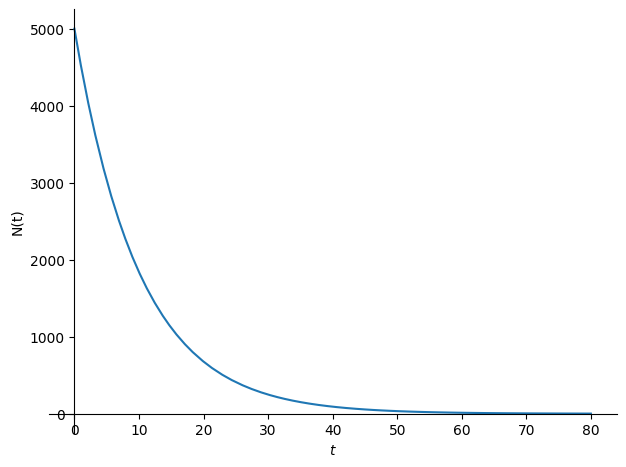

In [ ]:
decay = decay.subs({l:0.1})
plot(decay.rhs, (t,0,80), ylabel = 'N(t)')

## $\frac{dy}{dx}=y(1-x^2)$

In [ ]:
x = symbols('x')
y = symbols('y', cls=Function)
dy = diff(y(x),x)
eqn = Eq(dy, y(x)*(1-x**2))
dsolve(eqn)

Eq(y(x), C1*exp(x*(1 - x**2/3)))

## A falling ball with mass $m$ under quadratic drag, *i.e.*  force due to air resistance $F_D= q v^2$. Equation of motion: $F= mg - F_D$. Or,
$$m\frac{dv}{dt}=mg-qv^2$$

In [ ]:
m, g, q = symbols('m g q')
v = symbols('v', cls=Function)
LHS = m*diff(v(t), t)
RHS = m*g-q*v(t)**2
eqn = Eq(LHS, RHS)
quad_drag= dsolve(eqn)
quad_drag

Eq(v(t), -sqrt(g)*sqrt(m)/(sqrt(q)*tanh(sqrt(g)*sqrt(q)*log(exp(C1*m - 2*t))/(2*sqrt(m)))))

##Classwork: Linear drag problem
Solve the previous problem with Stoke's formula for air resistance, $F_D= qv$ with initial condition: $v(0)=0$. Also take $m=10$, $q=0.5$, $g=-9.8$. Then plot $v(t)$ vs. $t$.

#Second order ODE:

##Simple Harmonic Oscillator: $\ \ \frac{d^2x}{dt^2}+\omega^2x=0 \ \ $ with $\ \ \omega=\sqrt{k/m}$


In [ ]:
o, t = symbols('omega t')
x    = symbols('x', cls=Function)
ddx  = diff(x(t),t,2)
ode2 = Eq(ddx+o**2*x(t),0)
dsolve(ode2)

Eq(x(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

###Let $\omega=2$

In [ ]:
o=2
ode2 = Eq(ddx+o**2*x(t),0)
dsolve(ode2)

Eq(x(t), C1*sin(2*t) + C2*cos(2*t))

###Let $\omega=2$ and the initial conditions: $x(0)=0 \ \ $ and $\ \ \dot{x}(o)=10$.

In [ ]:
o    = 2
IC   = {x(t).subs(t,0): 0, diff(x(t),t).subs(t,0):10}
d2   = dsolve(ode2, ics=IC)
d2.subs({o:2})

Eq(x(t), 5*sin(2*t))

## Damped Harmonic Oscillator: $F= -kx - 2m\lambda v$
$$\frac{d^2x}{dt^2}+2\lambda \frac{dx}{dt}+\omega^2x=0$$

In [ ]:
l,o = symbols('lambda omega')
x   = symbols('x', cls=Function)
dx  = diff(x(t), t)
ddx = diff(x(t), t, 2)
LHS = ddx + 2*l*dx + o**2*x(t)
eqn2= Eq(LHS, 0)
dsolve(eqn2)

Eq(x(t), C1*exp(t*(-lambda + sqrt(lambda**2 - omega**2))) + C2*exp(-t*(lambda + sqrt(lambda**2 - omega**2))))

###IC: $x(0)=0$, $\ \ \dot{x}(0)=10$

In [ ]:
IC   = {x(t).subs(t,0): 0, diff(x(t),t).subs(t,0):10}
damped_SH = dsolve(eqn2, ics=IC)
damped_SH

Eq(x(t), 5*exp(t*(-lambda + sqrt(lambda**2 - omega**2)))/sqrt(lambda**2 - omega**2) - 5*exp(-t*(lambda + sqrt(lambda**2 - omega**2)))/sqrt(lambda**2 - omega**2))

###Let $\lambda=5$ and $\ \ \omega=3$

In [ ]:
damped_SH = damped_SH.subs({l:5, o:3})
damped_SH

Eq(x(t), 5*exp(-t)/4 - 5*exp(-9*t)/4)

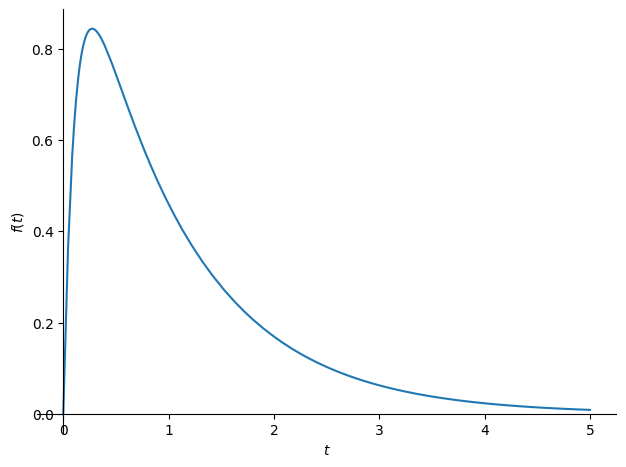

In [ ]:
plot(damped_SH.rhs, (t,0,5))

## The linear drag problem revisited $F= mg - F_D$ with $F_D= qv$:
$$ \begin{align}
&m\frac{d^2y}{dt^2} = mg - qv \\
\text{or,} \ \ \ &m\frac{d^2y}{dt^2} + q \frac{dy}{dt}- mg=0
\end{align} $$

In [ ]:
m, q, g = symbols('m q g')
y       = symbols('y', cls=Function)
dy      = diff(y(t), t)
ddy     = diff(y(t), t, 2)

LHS     = m*ddy + q*dy - m*g
ode3    = Eq(LHS, 0)
dsolve(ode3)

Eq(y(t), C1 + C2*exp(-q*t/m) + g*m*t/q)

###Initial Conditions:
$y(0)=100$, $\ \ \dot{y}(0)=0$

In [ ]:
IC = {y(t).subs(t,0):100, dy.subs(t,0):0}
dsolve(ode3, ics=IC)

Eq(y(t), g*m**2*exp(-q*t/m)/q**2 + g*m*t/q + (-g*m**2 + 100*q**2)/q**2)

###Insert $m=10$, $q=0.5$, $g=-9.8$

In [ ]:
lin_drag= dsolve(ode3, ics=IC)
lin_drag= lin_drag.subs({m:10, q: 0.5, g:-9.8})
lin_drag

Eq(y(t), -196.0*t + 4020.0 - 3920.0*exp(-0.05*t))

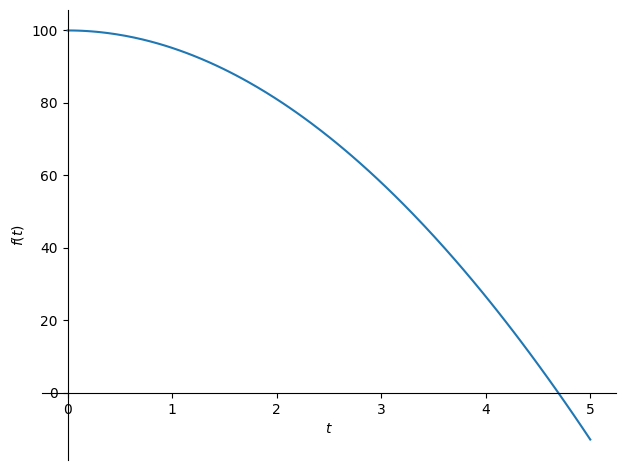

In [ ]:
plot(lin_drag.rhs, (t, 0, 5))